<h1><Center>Importing All The Required Packages </Center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


<h1><Center>Path of the DataSet

In [5]:
file_id =  "1LE7oJ5aTrPLhwgFA8AtWR7eYc3eiQiiJ"
file_path = f"https://drive.google.com/uc?export=download&id={file_id}"

<h1><Center>Reading DataSet

In [7]:
data  = pd.read_csv(file_path)
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


<h1> <Center>Selecting Features From The Dataset

In [8]:
X = data[["ENGINESIZE","CYLINDERS"]]
Y = data[["CO2EMISSIONS"]]

<h1> <Center> Visualizing The Features From The Dataset

Text(0, 0.5, 'CYLINDERS')

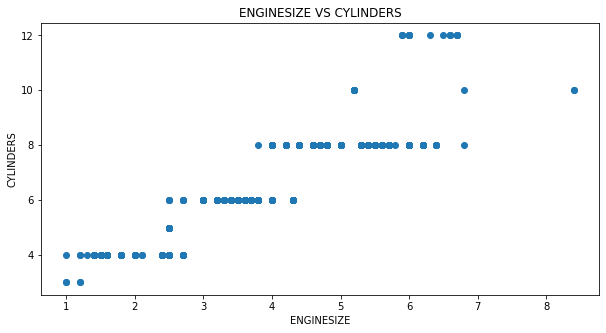

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.title("ENGINESIZE VS CYLINDERS")
plt.xlabel(X.iloc[:,0].name)
plt.ylabel(X.iloc[:,1].name)

<h1><Center> Splitting The data into Train Test Split

In [10]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

<h1><center>Predicting The CO2EMMISION Directly By using Linear-Regression

In [11]:
lr = LinearRegression().fit(x_train,y_train)
y_pred = lr.predict(x_test)
error = (y_pred-y_test)**2
print("\nMean Squared Error Of ",error.mean(),)
y_pred


Mean Squared Error Of  CO2EMISSIONS    930.815783
dtype: float64


array([[314.46030592],
       [262.96661675],
       [265.86101087],
       [248.49464617],
       [202.78974524],
       [248.49464617],
       [265.86101087],
       [277.43858734],
       [323.14348827],
       [265.86101087],
       [265.86101087],
       [405.87010779],
       [254.2834344 ],
       [262.96661675],
       [265.86101087],
       [262.96661675],
       [191.21216877],
       [265.86101087],
       [191.21216877],
       [331.82667063],
       [323.14348827],
       [197.000957  ],
       [254.2834344 ],
       [268.75540499],
       [248.49464617],
       [197.000957  ],
       [202.78974524],
       [191.21216877],
       [337.61545886],
       [254.2834344 ],
       [334.72106474],
       [214.3673217 ],
       [197.000957  ],
       [323.14348827],
       [248.49464617],
       [314.46030592],
       [294.1995471 ],
       [331.82667063],
       [202.78974524],
       [217.26171582],
       [191.21216877],
       [191.21216877],
       [185.42338053],
       [217

<h1><Center>By Using K-Means Clustring And Linear-Regression Model

In [12]:
class Co2Emisson:

    def __init__(self,clusters = 2):
        self.clusters = clusters

    def fit(self,x,y):
        
        self.kmeanmodel = KMeans(n_clusters=self.clusters,n_init=10)
        self.kmeanmodel.fit(x)
        self.Linermodel = []
        for clus in np.unique(self.kmeanmodel.labels_):
            print(clus)
            x_train = x.iloc[self.kmeanmodel.labels_==clus,:]
            y_train = y.iloc[self.kmeanmodel.labels_==clus,[0]]
            self.Linermodel.append((clus,LinearRegression().fit(x_train,y_train)))
        self.Linermodel = np.array(self.Linermodel)
        
    def predict(self, x):
        y_pred = []
        test_clusters = self.kmeanmodel.predict(x)
        for clu in np.unique(test_clusters):
            model =self.Linermodel[self.Linermodel[:,0]==clu,1][0]
            indx = [i for i in range(len(test_clusters)) if test_clusters[i]==clu]
            y_pred.append(pd.DataFrame(model.predict(x[test_clusters==clu]),index=indx,columns=["CO2EMISSIONS"]))
        return pd.concat(y_pred).sort_index()

<h1><Center>Finding The Best K Value For K-Means By using Silhouette Score

K =  4.0


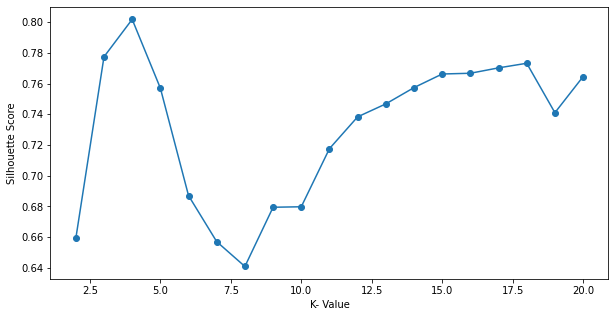

In [13]:
from sklearn.metrics import silhouette_score as ss
plt.figure(figsize=(10,5))
score=[]
for k in range(2,21):
    km = KMeans(n_clusters=k,n_init=10).fit(X)
    score.append((k,ss(X,km.labels_)))
score = np.array(score)
plt.plot(score[:,0],score[:,1],marker ='o')
plt.xlabel('K- Value')
plt.ylabel('Silhouette Score')
print("K = ",score[score[:,1].argmax(),0])


<h1><center>Clustring The Data By Using Our Model

0
1
2
3


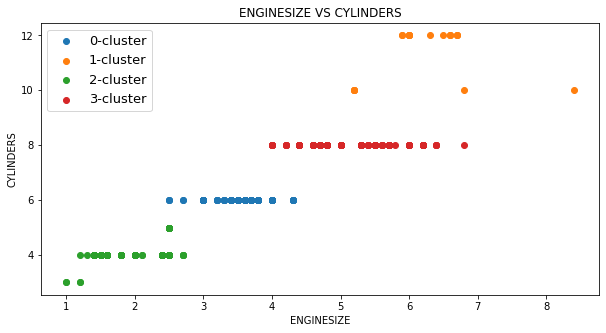

In [14]:
co2 = Co2Emisson(clusters=4)
co2.fit(x_train,y_train)
plt.figure(figsize=(10,5))
for i in range(co2.clusters):
    plt.scatter(x_train.iloc[co2.kmeanmodel.labels_==i,0],x_train.iloc[co2.kmeanmodel.labels_==i,1])
plt.title("ENGINESIZE VS CYLINDERS")
plt.xlabel(X.iloc[:,0].name)
plt.ylabel(X.iloc[:,1].name)
plt.legend(["0-cluster","1-cluster","2-cluster","3-cluster"],loc=2,fontsize=13)

<h1><Center>Predicting CO2Emission By Using K-Means And Linear-Regresion Model

In [15]:
y_pred = co2.predict(x_test)
y_pred= (y_pred.sub(y_test.values,axis=1))**2
print("Mean Squared Error = ",y_pred.mean())
y_pred

Mean Squared Error =  CO2EMISSIONS    899.776947
dtype: float64


,CO2EMISSIONS
0,272.811729
1,1639.530853
2,910.430768
3,830.214940
4,16.799264
...,...
209,82.786170
210,136.209819
211,186.893404
212,103.765787
